In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA

plt.rcParams.update({'font.size': 15})

In [2]:

path = '../data/processed/pca_inputs/standardized_MQT_pip.csv'
features = ['std_n0', 'std_lambda', 'std_Fs', 'std_Rho', 'std_D0', 'std_Nt']

df_all = pd.read_csv(path)
df_all.dropna(inplace=True)
scaled_data = df_all.loc[:, features].values
print(scaled_data)

[[-1.39662165 -0.78772039 -1.3298609  -1.66696972 -0.40781753 -1.41326208]
 [-1.43069851 -0.90129765 -1.17975185 -1.47287451 -0.18277499 -1.43239477]
 [-0.88626364 -0.61101023 -0.93227559 -1.15964323 -0.31726909 -0.8828158 ]
 ...
 [ 0.55240756 -0.13727218 -0.03867623  0.08430418 -0.30372754  0.61772309]
 [ 0.56004451 -0.0045027  -0.09214981  0.05060564 -0.34419175  0.60561266]
 [ 0.59875862  0.04968709 -0.24867424  0.04505392 -0.62371577  0.63484539]]


In [3]:
pca = PCA(n_components = 0.95)
pca.fit(scaled_data)
reduced = pca.transform(scaled_data)

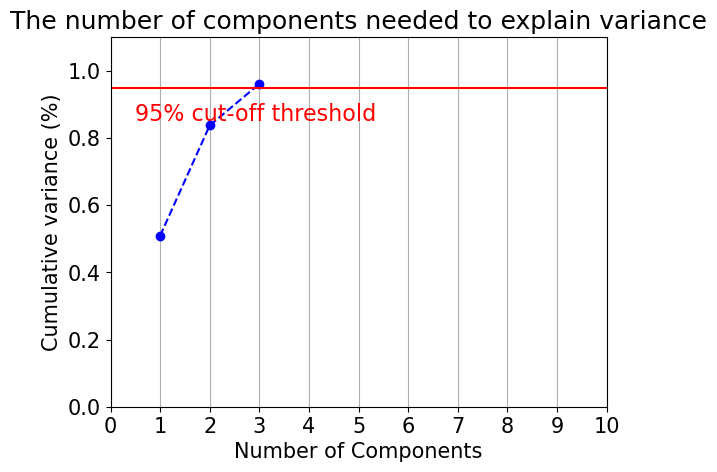

In [4]:
fig, ax = plt.subplots()
xi = np.arange(1, 4, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['eof1', 'eof2'])

df_all = df_all.reset_index(drop=True)
principalDf = principalDf.reset_index(drop=True)
df_combo = pd.concat([df_all, principalDf], axis=1)
print(pca.explained_variance_ratio_)
print(df_combo)



[0.5086492  0.32842399]
                   time        n0    lambda        Fs       Rho        D0  \
0       2015-01-31 2:25  1.340745 -0.194910 -1.493774 -2.547002  0.054159   
1       2015-01-31 2:30  1.313528 -0.207620 -1.434244 -2.472343  0.107672   
2       2015-01-31 2:35  1.748374 -0.175133 -1.336101 -2.351858  0.075690   
3       2015-01-31 2:40  1.964473 -0.147827 -1.208898 -2.144238  0.112926   
4       2015-01-31 2:45  1.675988 -0.102572 -1.490229 -2.415721  0.032213   
...                 ...       ...       ...       ...       ...       ...   
94771  2022-11-16 23:15  2.861302 -0.151505 -0.982994 -1.863180  0.093857   
94772  2022-11-16 23:20  2.939715 -0.119270 -1.019382 -1.917777  0.071044   
94773  2022-11-16 23:25  2.897457 -0.122115 -0.981720 -1.873371  0.078910   
94774  2022-11-16 23:30  2.903557 -0.107257 -1.002926 -1.886333  0.069288   
94775  2022-11-16 23:35  2.934478 -0.101192 -1.065000 -1.888469  0.002820   

             Nt    std_n0  std_lambda    std_Fs   s

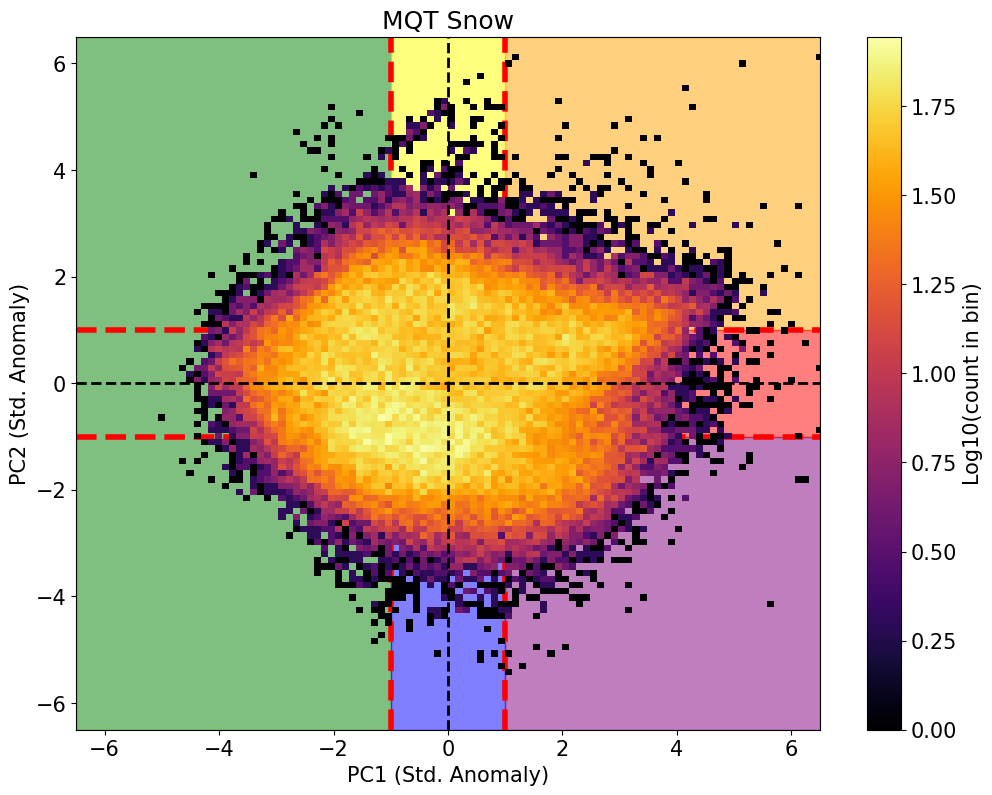

In [43]:

fig, ax = plt.subplots(figsize=(12,9))
ax.set_facecolor('white')

plt.title('MQT Snow')
plt.xlabel('PC1 (Std. Anomaly)')
plt.ylabel('PC2 (Std. Anomaly)')

plt.axvline(-1, linewidth=4, color='red', linestyle='--')
plt.axvline(1, linewidth=4, color='red', linestyle='--')
plt.axhline(-1, linewidth=4, color='red', linestyle='--')
plt.axhline(1, linewidth=4, color='red', linestyle='--')
plt.axhline(0, linewidth=2, color='black', linestyle='--', zorder=1001)
plt.axvline(0, linewidth=2, color='black', linestyle='--', zorder=1001)

plt.fill_between([-6.5, -1], -6.5, 6.5, color='green', alpha=0.5)
plt.fill_between([-1, 1], -6.5, -1, color='blue', alpha=0.5)
plt.fill_between([-1, 1], 6.5, 1, color='yellow', alpha=0.5)
plt.fill_between([1, 6.5], -6.5, -1, color='purple', alpha=0.5)
plt.fill_between([1, 6.5], 1, 6.5, color='orange', alpha=0.5)
plt.fill_between([1, 6.5], -1, 1, color='red', alpha=0.5)
plt.xlim((-6.5, 6.5))
plt.ylim((-6.5, 6.5))

counts, xedges, yedges = np.histogram2d(principalDf.eof1, principalDf.eof2, bins=100)
counts = np.where(counts<1, np.nan, counts)

counts = np.log10(counts)
pcm = ax.pcolormesh(xedges, yedges, counts.T, cmap='inferno', rasterized=True, zorder=1000)

cbar = plt.colorbar(pcm, ax=ax, label='Log10(count in bin)')
cbar.ax.minorticks_off()  # turn off minor ticks on the colorbar

plt.show()


In [44]:
df_combo

,time,n0,lambda,Fs,Rho,D0,Nt,std_n0,std_lambda,std_Fs,std_Rho,std_D0,std_Nt,eof1,eof2,eof1_dir,eof2_dir
0,2015-01-31 2:25,1.340745,-0.194910,-1.493774,-2.547002,0.054159,2.857590,-1.396622,-0.787720,-1.329861,-1.666970,-0.407818,-1.413262,3.009982,0.137011,pos,pos
1,2015-01-31 2:30,1.313528,-0.207620,-1.434244,-2.472343,0.107672,2.843557,-1.430699,-0.901298,-1.179752,-1.472875,-0.182775,-1.432395,2.883281,-0.180689,pos,neg
2,2015-01-31 2:35,1.748374,-0.175133,-1.336101,-2.351858,0.075690,3.246658,-0.886264,-0.611010,-0.932276,-1.159643,-0.317269,-0.882816,2.023277,0.123136,pos,pos
3,2015-01-31 2:40,1.964473,-0.147827,-1.208898,-2.144238,0.112926,3.440503,-0.615705,-0.367019,-0.611524,-0.619883,-0.160679,-0.618533,1.289899,0.020438,pos,pos
4,2015-01-31 2:45,1.675988,-0.102572,-1.490229,-2.415721,0.032213,3.102839,-0.976893,0.037359,-1.320923,-1.325671,-0.500106,-1.078896,2.270801,0.746849,pos,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94771,2022-11-16 23:15,2.861302,-0.151505,-0.982994,-1.863180,0.093857,4.339423,0.507140,-0.399884,-0.041890,0.110798,-0.240872,0.607035,-0.458644,0.146181,neg,pos
94772,2022-11-16 23:20,2.939715,-0.119270,-1.019382,-1.917777,0.071044,4.386297,0.605314,-0.111843,-0.133645,-0.031140,-0.336808,0.670942,-0.503135,0.480542,neg,pos
94773,2022-11-16 23:25,2.897457,-0.122115,-0.981720,-1.873371,0.078910,4.347263,0.552408,-0.137272,-0.038676,0.084304,-0.303728,0.617723,-0.536910,0.351296,neg,pos
94774,2022-11-16 23:30,2.903557,-0.107257,-1.002926,-1.886333,0.069288,4.338380,0.560045,-0.004503,-0.092150,0.050606,-0.344192,0.605613,-0.525390,0.481681,neg,pos


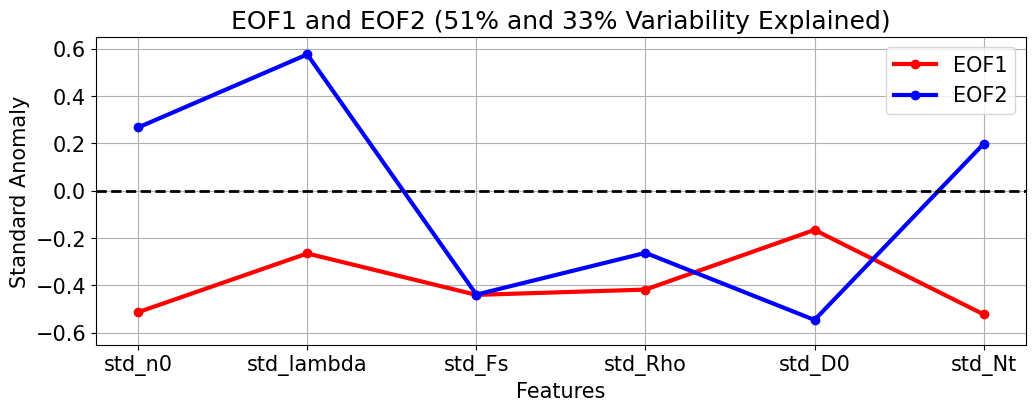

In [7]:
loadings = pd.DataFrame(pca.components_.T, columns=['EOF1', 'EOF2'], index=['std_n0', 'std_lambda', 'std_Fs', 'std_Rho', 'std_D0', 'std_Nt'])

fig, ax = plt.subplots(figsize=(12,4))

# Generate line plots
ax.plot(loadings['EOF1'], marker='o', color='red', linewidth=3, label='EOF1')
ax.plot(loadings['EOF2'], marker='o', color='blue', linewidth=3, label='EOF2')

ax.set_title('EOF1 and EOF2 (51% and 33% Variability Explained)')
ax.set_ylabel('Standard Anomaly')
ax.set_xlabel('Features')
ax.grid(True)
ax.set_ylim((-0.65, 0.65))
ax.axhline(0, linewidth=2, linestyle='--', color='black')
ax.legend()

plt.show()

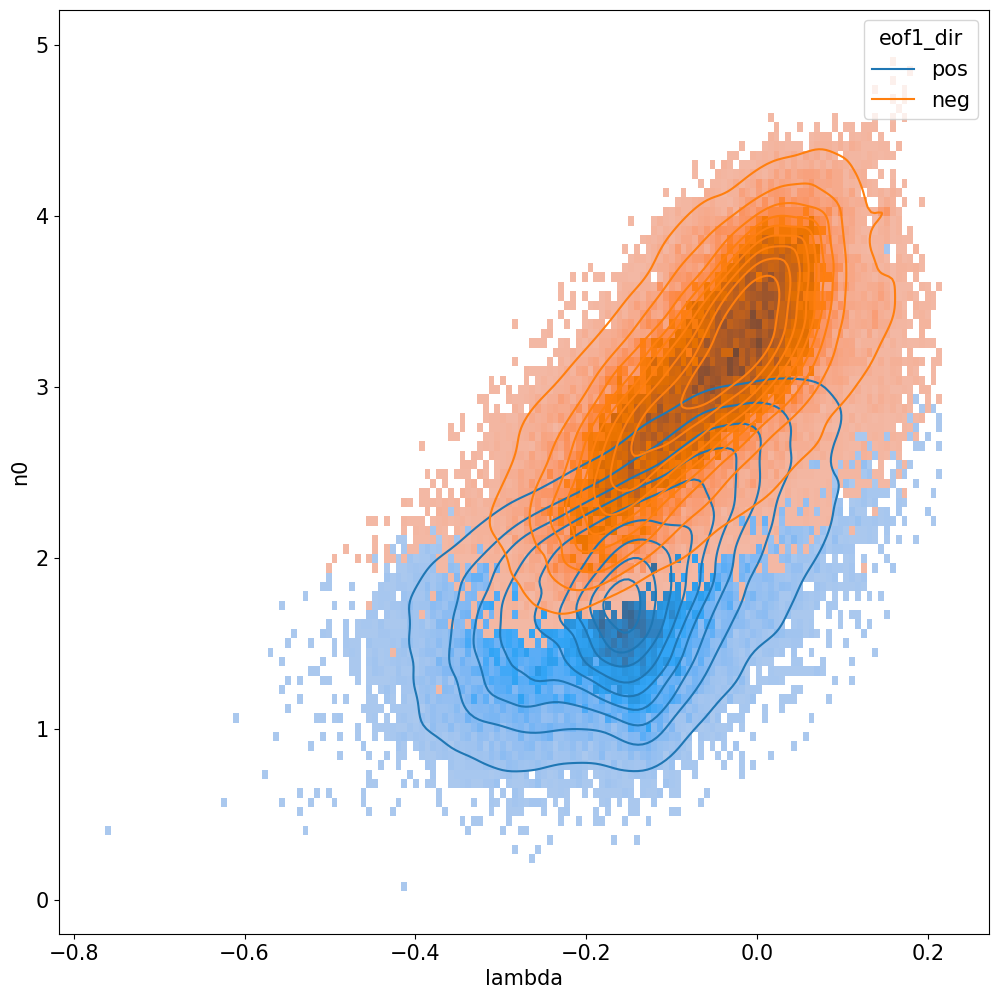

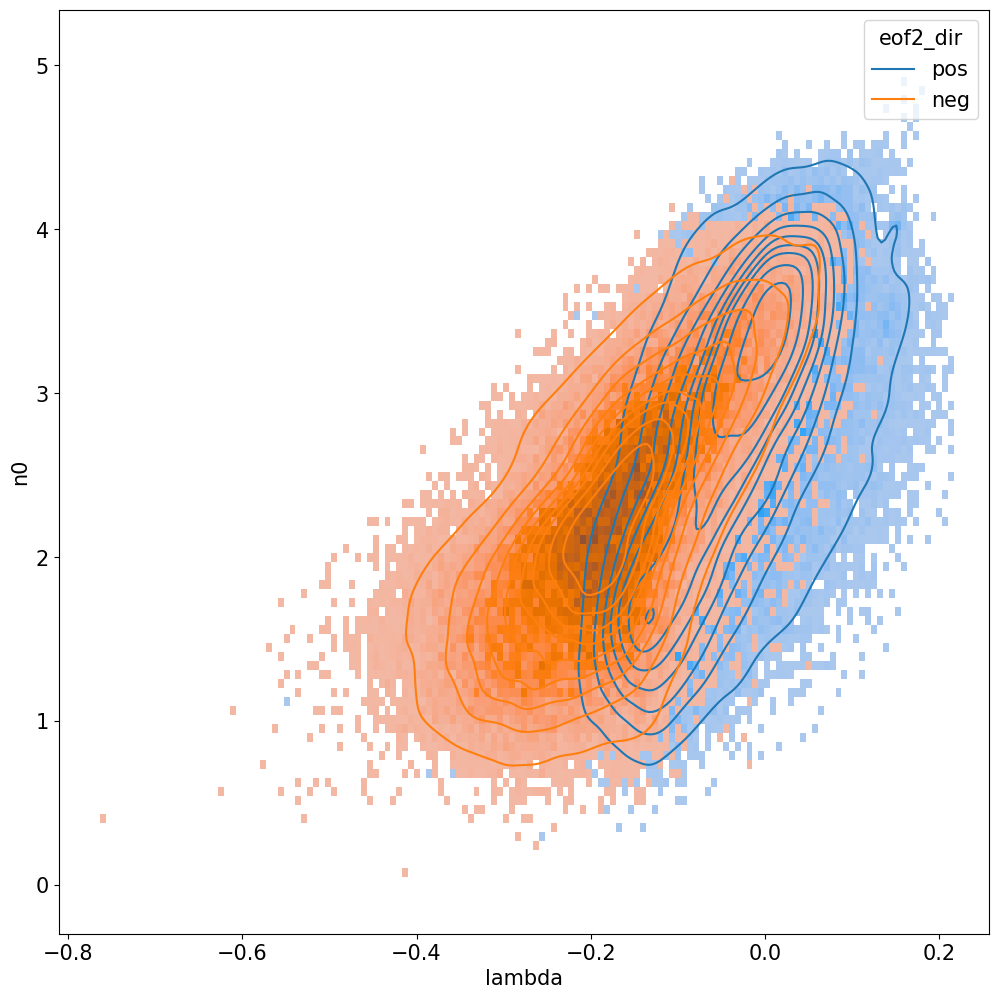

In [32]:

df_combo['eof1_dir'] = df_combo['eof1'].apply(lambda x: 'pos' if x > 0 else 'neg')
df_combo['eof2_dir'] = df_combo['eof2'].apply(lambda x: 'pos' if x > 0 else 'neg')


fig, ax = plt.subplots(figsize=(12,12))
sns.histplot(df_combo, x="lambda", y="n0", hue="eof1_dir")
sns.kdeplot(df_combo, x="lambda", y="n0", hue="eof1_dir")
plt.show()

fig, ax = plt.subplots(figsize=(12,12))
sns.histplot(df_combo, x="lambda", y="n0", hue="eof2_dir")
sns.kdeplot(df_combo, x="lambda", y="n0", hue="eof2_dir")
plt.show()



